In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

Reading DataFrame showing first 5

In [34]:
# Create a pandas DataFrame
df = pd.read_csv(r'C:/Users/draco\Desktop/Python Boot Camp/Jupyter/Pandas/Projects/Kingdom_character_stats.csv')

# Head displays the first few rows of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        90 non-null     object
 1   Strength    90 non-null     int64 
 2   Leadership  90 non-null     int64 
 3   Knowledge   90 non-null     int64 
 4   State       88 non-null     object
 5   Rank        90 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


Check for missing data in sheet

In [36]:
not_missing_data = df['State'].notnull
print(not_missing_data)


<bound method Series.notnull of 0      Qin
1     Zhao
2     Zhao
3      Qin
4      Qin
      ... 
85     Qin
86     Qin
87     Chu
88     Yan
89    Zhao
Name: State, Length: 90, dtype: object>


If there any missing data fill with NA

In [38]:
#df.fillna('NA', inplace=True)
df.fillna('NA',inplace=True)
nas = df[df.State == 'NA']
nas

,Name,Strength,Leadership,Knowledge,State,Rank
73,Yuuren (S+),95,80,83,NA,General
74,Kyoushou (S+),90,80,85,NA,General


Only display the generals from the state of Qin

In [39]:
qin_Gen = df[df.State == 'Qin']
qin_Gen.head()

,Name,Strength,Leadership,Knowledge,State,Rank
0,Yotanwa,95,99,96,Qin,Great General
3,Sei,82,98,92,Qin,King
4,Kyou,94,97,95,Qin,General
5,Shouheikun,90,96,98,Qin,General
6,Duke Hyou (I),95,95,70,Qin,General


Sort the Qin generals by rank?

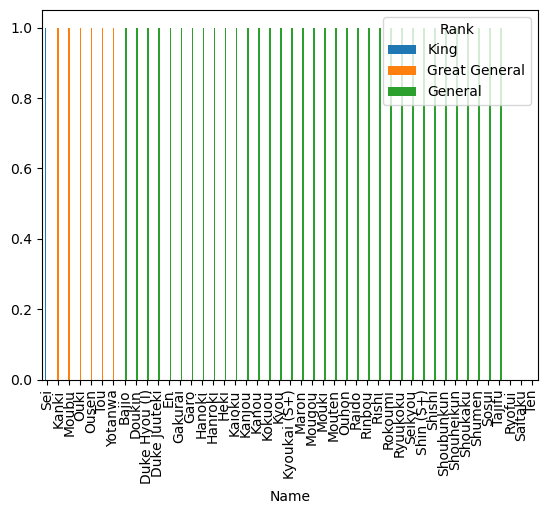

In [59]:
#First group data, Unstack, create variable to sort values, add Plot
#g = df.groupby(['Athlete', 'Medal']).size().unstack('Medal',fill_value=0)
#g.sort_values(['Gold','Silver','Bronze'], ascending=False)[['Gold', 'Silver','Bronze']].head().plot(kind='bar')
#fo.Sport.value_counts().plot(kind='line'); #added semi colon to remove plot title
ns = qin_Gen.groupby(['Name','Rank']).size().unstack('Rank',fill_value=0)
ns.sort_values(['King','Great General','General'], ascending=False)[['King','Great General','General']].plot(kind='bar');

Only Display generals of Rank: Great General

In [80]:
gg = df[(df.Rank == 'Great General')]
gg

,Name,Strength,Leadership,Knowledge,State,Rank
0,Yotanwa,95,99,96,Qin,Great General
1,Riboku,91,99,100,Zhao,Great General
2,Renpa,97,98,96,Zhao,Great General
7,Gekishin (Obs),90,95,92,Yan,Great General
9,Tou,96,94,94,Qin,Great General
10,Ousen,93,94,97,Qin,Great General
11,Kanki,93,94,95,Qin,Great General
12,Ouki,98,93,95,Qin,Great General
13,Karin,94,93,97,Chu,Great General
14,Gokei,89,92,97,Wei,Great General


Sort the values of strength

<Axes: >

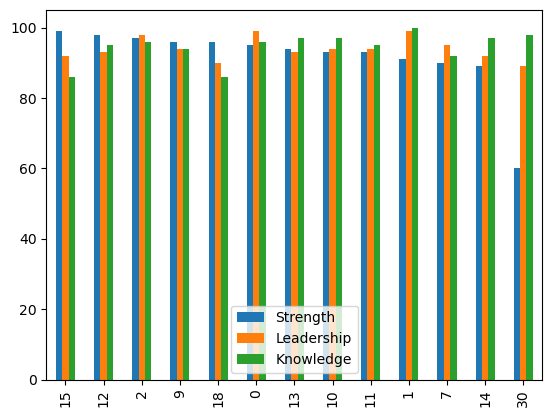

In [81]:
#First group data, Unstack, create variable to sort values, add Plot
sorted_str = gg.sort_values(by='Strength',ascending=False)
sorted_str.plot(kind='bar')

Modify it so only generals with stats higher then 93

In [82]:
gg = df[(df.Rank == 'Great General') & (df.Strength > 93) & (df.Leadership > 93) & (df.Knowledge > 93)]
gg

,Name,Strength,Leadership,Knowledge,State,Rank
0,Yotanwa,95,99,96,Qin,Great General
2,Renpa,97,98,96,Zhao,Great General
9,Tou,96,94,94,Qin,Great General
